In [1]:
import matplotlib.pyplot as plt
from getdist import plots, MCSamples
from getdist import *

# import planckStyle
import pylab
import numpy as np
import tkinter
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.ticker

import corner 
# matplotlib.use('TkAgg')
%matplotlib inline

In [2]:
dir_name = '/home/isidro/Documents/github/cosmo_tools/models/nled/chains_nled/'

roots = [
         'NLEDCosmology_phy_HD+Pantheon+CBAO_mcmc',
  ]

roots2 = [
         'NLED2Cosmology_phy_HD+Pantheon+CBAO_mcmc',
  ]
# 
# roots_bao = ['NLED_phy_CBAO_nested_multi', 'NLED_phy_HD+SN+CBAO_nested_multi']




In [6]:
g = plots.getSinglePlotter(chain_dir = dir_name, width_inch= 10,
                          ratio = 0.9, 
                          analysis_settings={'smooth_scale_2D': 0.6,
                                             'smooth_scale_1D': 0.6, 
                                             'ignore_rows': 0.1})

<Figure size 720x648 with 0 Axes>

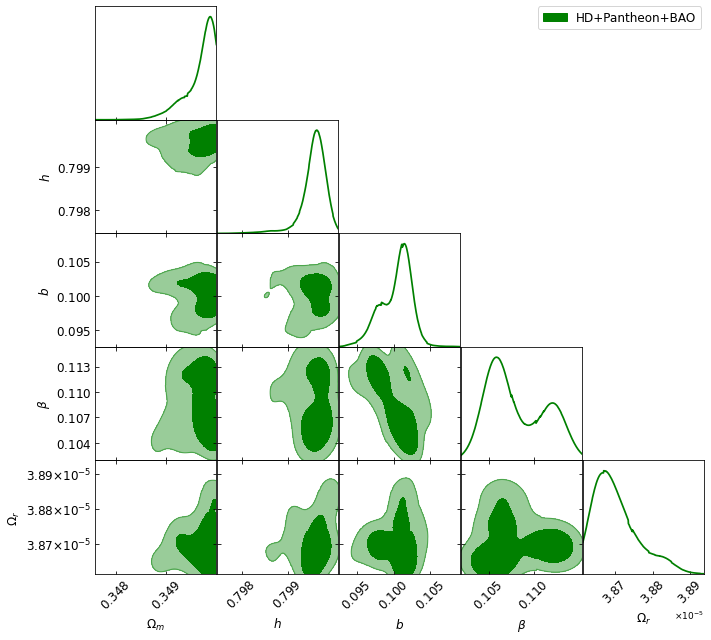

In [7]:
#g.settings.axes_fontsize = 5
g.settings.lab_fontsize = 15
g.settings.x_label_rotation= 45
#g.settings.alpha_filled_add = 0.9
g.settings.legend_fontsize = 15
g.settings.axes_fontsize = 15   
g.settings.lw1 = 3
g.settings.linewidth_contour = 2


g.triangle_plot(roots, ['Om','h', 'b', 'beta', 'Omrad'],               
                diag1d_kwargs={'colors':['green', 'blue', 'red'], 
                               'alphas':[1, 1, 1]},
                colors=['green', 'blue', 'red'],
                alphas = [1, 1, 1],
                legend_labels=['HD+Pantheon+BAO'],
                legend_loc='upper right',
                filled = True,
                normalized=False, 
                shaded=False, 
#                 param_limits={'b': [-1, 1], 'beta':[0, 1]},
                
#                 parampriors={'mquin': [0, 3], 'mphan':[0, 2], 'beta':[-8, 12]}
           )

# g.add_text('Quintom with $\\beta$', x= 0.35, y= 2.5, fontsize=14)
#            \n 350 live points \n 0.2 burn', 0.1, 2)        
# plt.savefig('nled_250lp.png', dpi=300)
# plt.savefig('img/nled_250lp_HD_SN.png', dpi=300)

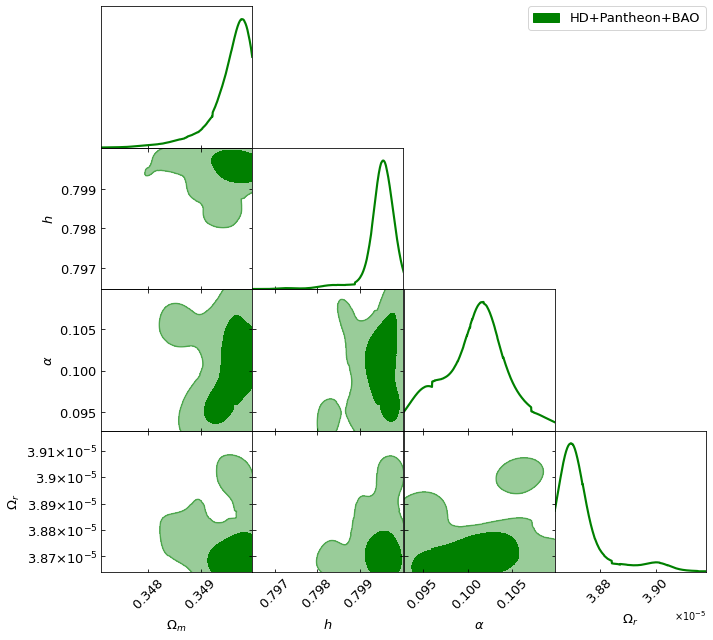

In [8]:
#g.settings.axes_fontsize = 5
g.settings.lab_fontsize = 15
g.settings.x_label_rotation= 45
#g.settings.alpha_filled_add = 0.9
g.settings.legend_fontsize = 15
g.settings.axes_fontsize = 15   
g.settings.lw1 = 3
g.settings.linewidth_contour = 2


g.triangle_plot(roots2, ['Om','h', 'alfa', 'Omrad'],               
                diag1d_kwargs={'colors':['green', 'blue', 'red'], 
                               'alphas':[1, 1, 1]},
                colors=['green', 'blue', 'red'],
                alphas = [1, 1, 1],
                legend_labels=['HD+Pantheon+BAO'],
                legend_loc='upper right',
                filled = True,
                normalized=False, 
                shaded=False, 
#                 param_limits={'Omrad': [0.000001, 0.00001]},
                
#                 parampriors={'mquin': [0, 3], 'mphan':[0, 2], 'beta':[-8, 12]}
           )

# g.add_text('Quintom with $\\beta$', x= 0.35, y= 2.5, fontsize=14)
#            \n 350 live points \n 0.2 burn', 0.1, 2)        
# plt.savefig('nled_250lp.png', dpi=300)
# plt.savefig('img/nled_250lp_HD_SN.png', dpi=300)